# Diabetes Prediction Using Deep Learning

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading dataset
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Following columns or variables have an invalid zero value:

    -Glucose
    -BloodPressure
    -SkinThickness
    -Insulin
    -BMI
    Because above columns can not be zero

### Replacing Zeros with Nan

In [9]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### replacing Nan values

In [10]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)


In [11]:
df_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking Feature independence using (Heat map)

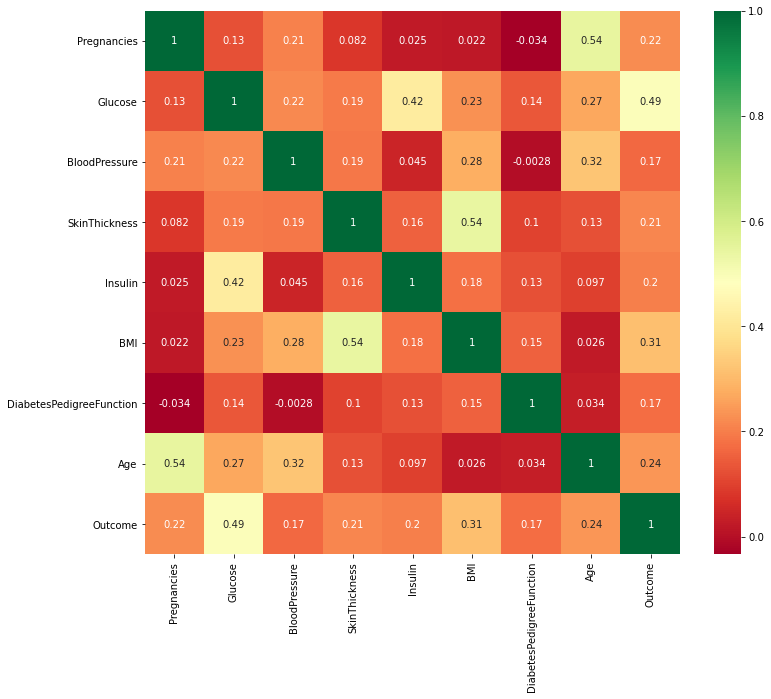

In [12]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

### Spliting data into train and test

In [13]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Data Scaling

In [14]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler()
x =  pd.DataFrame(scaled_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [15]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [16]:
#x = df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_copy['Outcome']

In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Spliting Data into train and test

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### preparing data for Model

In [57]:
X_train = x_train.values
Y_train = y_train.values
X_test  = x_test.values
Y_test  = y_test.values

### Making Model

In [58]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(20,activation=tf.nn.relu),
tf.keras.layers.Dense(12,activation=tf.nn.relu),
tf.keras.layers.Dense(12,activation=tf.nn.tanh),
tf.keras.layers.Dense(8,activation=tf.nn.tanh),    
tf.keras.layers.Dense(2,activation=tf.nn.sigmoid)
])

In [59]:
optimiser = tf.keras.optimizers.Adam()
model.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [60]:
### Training Model

In [61]:
model.fit(X_train, Y_train, batch_size=None, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 1ms/step - loss: 0.6519 - accuracy: 0.6809
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.6227 - accuracy: 0.6868
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.6946
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.7198
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.7451
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7607
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7840
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7918
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.8016
Epoch 10/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7938
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.8911
Epoch 84/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2740 - accuracy: 0.8930
Epoch 85/100
17/17 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.9008
Epoch 86/100
17/17 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.8911
Epoch 87/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2643 - accuracy: 0.9027
Epoch 88/100
17/17 [==============================] - 0s 1ms/step - loss: 0.2642 - accuracy: 0.9008
Epoch 89/100
17/17 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.9027
Epoch 90/100
17/17 [==============================] - 0s 1ms/step - loss: 0.2614 - accuracy: 0.8949
Epoch 91/100
17/17 [==============================] - 0s 1ms/step - loss: 0.2565 - accuracy: 0.9008
Epoch 92/100
17/17 [==============================] - 0s 1ms/step - loss: 0.2566 - accuracy: 0.9008
Epoch 93/100


In [62]:
model.evaluate(X_test, Y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.6135 - accuracy: 0.7402


[0.6134932041168213, 0.7401574850082397]